<a href="https://colab.research.google.com/github/Abhinav00077/neural_network/blob/main/mnistimageclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

In [40]:
x_train_full.shape

(60000, 28, 28)

In [41]:
x_valid, X_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [42]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [43]:
class_names[y_train[0]]

'Coat'

In [44]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [47]:
history=model.fit(X_train,y_train,epochs=30,
                  validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7246 - accuracy: 0.7606 - val_loss: 0.5036 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4913 - accuracy: 0.8292 - val_loss: 0.4534 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4445 - accuracy: 0.8443 - val_loss: 0.4314 - val_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4169 - accuracy: 0.8529 - val_loss: 0.4072 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3971 - accuracy: 0.8609 - val_loss: 0.3885 - val_accuracy: 0.8628
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3818 - accuracy: 0.8649 - val_loss: 0.3854 - val_accuracy: 0.8596
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3677 - accuracy: 0.8709 - val_loss: 0.3747 - val_accuracy:

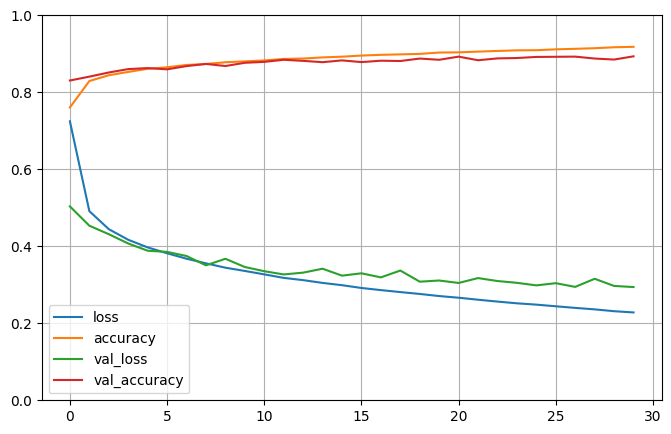

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 55.4583 - accuracy: 0.8596


[55.458335876464844, 0.8596000075340271]

In [52]:
X_new = x_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 110ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)